In [1]:
import correctionlib
ceval = correctionlib.CorrectionSet.from_file("/afs/cern.ch/user/s/shsong/HiggsDNA/jsonpog-integration/POG/EGM/2017_UL/photon.json")
list(ceval.keys())

['UL-Photon-CSEV-SF', 'UL-Photon-ID-SF', 'UL-Photon-PixVeto-SF']

In [250]:
phopt = ak.Array([[10.1, 200.2, 30.3], [40.4, 50.5], [60.6]])
phoeta = ak.Array([[-2.3, -1.2, 0.3], [1.2, 1.9], [2.4]])
nphoton = ak.num(phopt)
photons_flattenpt =ak.flatten(phopt)
photons_flatteneta =ak.flatten(phoeta)
pho_pt = np.clip(
    ak.to_numpy(photons_flattenpt),
    20.0, # SFs only valid for pT >= 20.0
    500.0
)
pho_eta = np.clip(
    ak.to_numpy(photons_flatteneta),
    -2.5, # SFs only valid for |eta| < 2.5
    2.5
)
sf=ceval['UL-Photon-ID-SF'].evaluate("2017","sf","Loose",pho_eta, pho_pt)
photonidsf=ak.unflatten(sf, nphoton)
print(photonidsf)

[[1.01, 1.04, 0.984], [0.99, 0.981], [0.998]]


In [213]:
import uproot
import correctionlib.schemav2 as cs
sfs = uproot.open("/afs/cern.ch/user/s/shsong/HiggsDNA/higgs_dna/systematics/data/egammaEffi.txt_EGM2D_PHO_MVA90_UL17.root:EGamma_SF2D")
sfsup=sfs.values()+sfs.errors()
sfsdown=sfs.values()-sfs.errors()
sfs.values()


array([[1.0094675 , 1.0056053 , 1.01      , 0.995671  , 0.9936306 ],
       [0.9712859 , 0.97911835, 0.9758343 , 0.9585666 , 1.0105017 ],
       [1.014966  , 0.99075145, 0.9648924 , 1.0187794 , 1.100271  ],
       [0.9768575 , 0.9754738 , 0.97669256, 1.0189945 , 1.0155039 ],
       [0.9786223 , 0.9790979 , 0.9758507 , 0.99346405, 1.0145904 ],
       [0.9774347 , 0.9801762 , 0.9768977 , 0.98914224, 0.95680344],
       [0.9743276 , 0.98210293, 0.9788654 , 1.019037  , 0.96080625],
       [0.9360544 , 0.9930556 , 1.0023475 , 1.0520581 , 0.9031505 ],
       [0.9736842 , 0.98018646, 0.9803695 , 0.9874572 , 0.9840728 ],
       [1.0059102 , 1.0022272 , 1.0022099 , 1.0076419 , 1.0096052 ]],
      dtype=float32)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe5f2fd62b0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe5f2f518b0>, text=[])

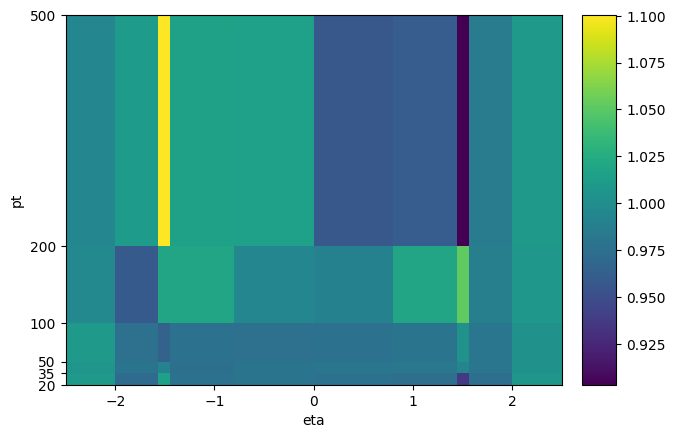

In [214]:
import hist 

# define the bin edges for the 2D histogram
xedge = [-2.5, -2.0, -1.566, -1.444, -0.8, 0.0, 0.8, 1.444, 1.566, 2.0, 2.5]
yedge = [20.0, 35.0, 50.0, 100.0, 200.0, 500.0]
sfhist = hist.Hist(
    hist.axis.Variable(xedge, label='eta'),  # xaxis:eta
    hist.axis.Variable(yedge, label='pt'),   # yaxis:pt
    storage=hist.storage.Double(),
    data=sfs.values()
)
sfhist.plot2d()


In [251]:
sfsdownhist = hist.Hist(
    hist.axis.Variable(xedge, label='eta'),  # xaxis:eta
    hist.axis.Variable(yedge, label='pt'),   # yaxis:pt
    storage=hist.storage.Double(),
    data=sfs.values()-sfs.errors()
)
sfsuphist = hist.Hist(
    hist.axis.Variable(xedge, label='eta'),  # xaxis:eta
    hist.axis.Variable(yedge, label='pt'),   # yaxis:pt
    storage=hist.storage.Double(),
    data=sfs.values()+sfs.errors()
)



In [219]:
import correctionlib.convert
# convert the sfs histogram to a correctionlib object
# without a name, the resulting object will fail validation
sfhist.name = "modified_photonID_sfs_2017"
sfhist.label = "out"
modified_photonID_2017_sfs = correctionlib.convert.from_histogram(sfhist)
# modified_photonID_2017_sfs.inputs=[cs.Variable(name="eta", type="real", description="Photon eta"), cs.Variable(name="pt", type="real", description="Photon pt")]
modified_photonID_2017_sfs.description = "scale factors for photon ID 2017"
# set overflow bins behavior (default is to raise an error when out of bounds)
modified_photonID_2017_sfs.data.flow = "clamp"


In [252]:
import correctionlib.convert
# convert the sfs histogram to a correctionlib object
# without a name, the resulting object will fail validation
sfhist.name = "modified_photonID_sfs_2017"
sfhist.label = "out"
modified_photonID_2017_sfs = correctionlib.convert.from_histogram(sfhist)
modified_photonID_2017_sfs.description = "scale factors for photon ID 2017"
# set overflow bins behavior (default is to raise an error when out of bounds)
modified_photonID_2017_sfs.data.flow = "clamp"


In [253]:
#same for sfsup and sfsdown
# create a correction object from the sfsup
sfsuphist.name = "modified_photonIDsfsup_2017"
sfsuphist.label = "out"
modified_photonID_2017sfsup = correctionlib.convert.from_histogram(sfsuphist)
modified_photonID_2017sfsup.description = "systematic uncertainty up for photon ID 2017"
modified_photonID_2017sfsup.data.flow = "clamp"
# create a correction object from the sfsdown
sfsdownhist.name = "modified_photonIDsfsdown_2017"
sfsdownhist.label = "out"
modified_photonID_2017sfsdown = correctionlib.convert.from_histogram(sfsdownhist)
modified_photonID_2017sfsdown.description = "systematic uncertainty down for photon ID 2017"
modified_photonID_2017sfsdown.data.flow = "clamp"


In [234]:
cset = correctionlib.schemav2.CorrectionSet(
    schema_version=2,
    description="my custom photonID corrections",
    corrections=[
        modified_photonID_2017_sfs,
        modified_photonID_2017sfsup,
        modified_photonID_2017sfsdown,
    ],
)

with open("/afs/cern.ch/user/s/shsong/HiggsDNA/bonus/mycorrections.json", "w") as fout:
    fout.write(cset.json(exclude_unset=True))

import gzip

with gzip.open("/afs/cern.ch/user/s/shsong/HiggsDNA/bonus/mycorrections.json.gz", "wt") as fout:
    fout.write(cset.json(exclude_unset=True))

In [244]:
evaluator = correctionlib.CorrectionSet.from_file("/afs/cern.ch/user/s/shsong/HiggsDNA/bonus/mycorrections.json")
for corr in evaluator.values():
    print(f"Correction {corr.name} has {len(corr.inputs)} inputs")
    for ix in corr.inputs:
        print("Input:",ix.name, ix.type, ix.description)


Correction modified_photonID_sfs_2017 has 2 inputs
Input:  real eta
Input:  real pt
Correction modified_photonIDsfsdown_2017 has 2 inputs
Input:  real eta
Input:  real pt
Correction modified_photonIDsfsup_2017 has 2 inputs
Input:  real eta
Input:  real pt


In [245]:
evaluator = correctionlib.CorrectionSet.from_file("/afs/cern.ch/user/s/shsong/HiggsDNA/bonus/mycorrections.json")
evaluator['modified_photonID_sfs_2017'].evaluate(1.5, 30.0)

0.9360544085502625

In [248]:
from correctionlib import _core
evaluator =_core.CorrectionSet.from_file("/afs/cern.ch/user/s/shsong/HiggsDNA/bonus/mycorrections.json")
phopt = ak.Array([[10.1, 200.2, 30.3], [40.4, 50.5], [60.6]])
phoeta = ak.Array([[-2.3, -1.2, 0.3], [1.2, 1.9], [2.4]])
nphoton = ak.num(phopt)
photons_flattenpt =ak.flatten(phopt)
photons_flatteneta =ak.flatten(phoeta)
pho_pt = np.clip(
    ak.to_numpy(photons_flattenpt),
    20.0, # SFs only valid for pT >= 20.0
    500.0
)
pho_eta = np.clip(
    ak.to_numpy(photons_flatteneta),
    -2.5, # SFs only valid for |eta| < 2.5
    2.5
)
sf=evaluator['modified_photonID_sfs_2017'].evalv(pho_eta, pho_pt)
sfup=evaluator['modified_photonIDsfsup_2017'].evalv(pho_eta, pho_pt)
sfdown=evaluator['modified_photonIDsfsdown_2017'].evalv(pho_eta, pho_pt)
photonidsf=ak.unflatten(sf, nphoton)
photonidsfup=ak.unflatten(sfup, nphoton)
photonidsfdown=ak.unflatten(sfdown, nphoton)
print("sf for photonID correction",photonidsf)
print("sfup for photonID correction",photonidsfup)
print("sfdown for photonID correction",photonidsfdown)


sf for photonID correction [[1.01, 0.977, 0.977], [0.974, 0.974], [1.01]]
sfup for photonID correction [[1.03, 1.01, 1], [1.01, 1.01], [1.02]]
sfdown for photonID correction [[0.991, 0.943, 0.953], [0.94, 0.94], [0.987]]
